# Week:2 Know your data

### Objective:
The objective of the assignment is to perform statistical analysis on a given data using python libraries and exploratory data analysis using data visualization techniques.

We have to use Fatal Police Shooting Data to answer the questions given in this notebook.

### Fatal Police Shooting Data

**About dataset**\
The dataset consists of following columns
1. **id**                         : unqiue identifier of each victim
2. **name**                       : name of a victim
3. **date**                       : date on fatal shooting 
4. **manner_of_death**            : manner of death classification
    * Shot
    * Shot and Tasered
5. **armed**                      : indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
    * undetermined: it is not known whether or not the victim had a weapon
    * unknown: the victim was armed, but it is not known what the object was
    * unarmed: the victim was not armed
6. **age**                        : age of victim
7. **gender**                     : the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
    * M: Male
    * F: Female
    * None: Unknown
8. **race**                       : race of victim
    * W: White, non-Hispanic
    * B: Black, non-Hispanic
    * A: Asian
    * N: Native American
    * H: Hispanic
    * O: Other
    * None: unknown
9. **city**                       : the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.
10. **state**                     : two-letter postal code abbreviation
11. **signs_of_mental_illness**   : News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.
12. **threat_level**              : These would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats. 
13. **flee**                      : News reports have indicated the victim was moving away from officers
    * Foot
    * Car
    * Not fleeing
14. **body_camera**               : News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

## Let's Begin

In [114]:
!pip install matplotlib
!pip install seaborn

In [115]:
# Install the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
# Load the dataframe 
df = pd.read_csv('./week_1_assignment_output.csv')
df.head()

# TODO: Code to fill: 
# 1. '<<__A__>>' --> Path of the csv file

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_categories
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Senior citizens
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Adult
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Youth
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Youth
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Adult


In [117]:
# Check the shape of the dataset
df.shape

(4478, 15)

### Question: 1 (2 Marks)

Display the count of missing values in each column of a dataset

In [118]:
df.isnull().sum()

# TODO: Code to fill: 
# 1. '<<__A__>>' --> Use correct method from pandas library to check for number of missing values


id                           0
name                         0
date                         0
manner_of_death              0
armed                      248
age                        169
gender                       5
race                       373
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       179
body_camera                  0
age_categories               0
dtype: int64

### Question: 2 (2 Marks)
Display the outliers present in the age column using IQR method

In [119]:
# Quantile 1 of age column (25 percentage)
Q1 = df['age'].quantile(0.25)
# Quantile 3 of age column (75 percentage)
Q3 =  df['age'].quantile(0.75)

print('Q1 = ',Q1)

print('Q3 = ',Q3)

Q1 =  27.0
Q3 =  45.0


In [120]:
# Inter Quartile Range
IQR = Q3 - Q1
IQR

18.0

In [121]:
# Outliers present in upper case
upper_case = Q3 + (1.5*IQR)
print('upper case :',upper_case)
# Outliers present in lower case
lower_case = Q1 - (1.5*IQR)
print('lower case :',lower_case)

upper case : 72.0
lower case : 0.0


In [122]:
# Loop through the each data record in the age column and append a data to the outliers list variable 
outliers = []
for i in df['age']: 
  if (i<lower_case or i>upper_case):  # if any data point in the age column less than lower case or any data point greater than upper case will be an outlier
    outliers.append(i)

# TODO: Code to fill: 

# 1. '<<__A__>>' --> column name
# 2. '<<__B__>>' --> Apply the condition

In [123]:
# print outliers
print('The outlier list is given below :')
print(outliers)


The outlier list is given below :
[75.0, 74.0, 77.0, 83.0, 76.0, 86.0, 76.0, 77.0, 76.0, 76.0, 80.0, 82.0, 86.0, 76.0, 83.0, 73.0, 91.0, 73.0, 79.0, 74.0, 75.0, 82.0, 76.0, 78.0, 84.0, 84.0, 81.0, 89.0, 73.0, 77.0, 76.0, 84.0, 81.0, 80.0, 77.0, 76.0, 74.0, 76.0, 73.0]


<Axes: ylabel='age'>

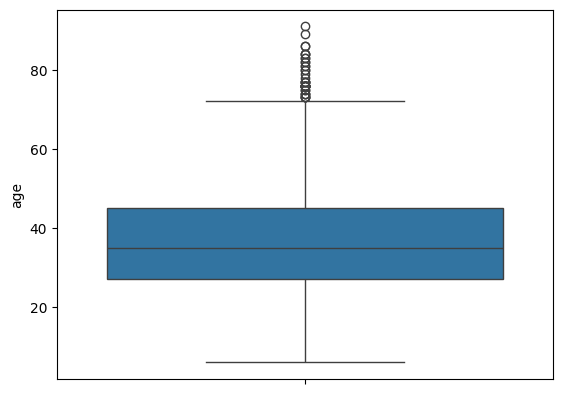

In [124]:
#Visualizing outliers
sns.boxplot(df['age'])


### Question: 3 (2 Marks) 
Group the year, gender, age categories to check how many victims were harmed

In [125]:
# Create a new column by extracting year from the date column
df['year'] = pd.to_datetime(df['date']).dt.year
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_categories,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Senior citizens,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Adult,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Youth,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Youth,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Adult,2015


In [126]:
#df.'<<__A__>>'([ '<<__B__>>'])[['id']].'<<__C__>>'>()

df.groupby([ 'year','gender','age'])[['id']].count()
 #Replace '<>' with correct method 

# TODO: Code to fill: 

# 1. '<<__A__>>' --> write your code here by selecting appropriate method/function from python 
# 2. '<<__B__>>' --> write column names from dataframe
# 3. '<<__C__>>' --> write your command 

id
year gender age     
2015 F      17.0   3
            20.0   1
            21.0   1
            22.0   1
            23.0   1
...               ..
2019 M      74.0   1
            76.0   2
            77.0   1
            80.0   1
            81.0   1

[459 rows x 1 columns]

### Question: 4 (2 Marks )
Generate a bar plot using seaborn and understand the threat levels of different age categories

<Axes: xlabel='age_categories', ylabel='count'>

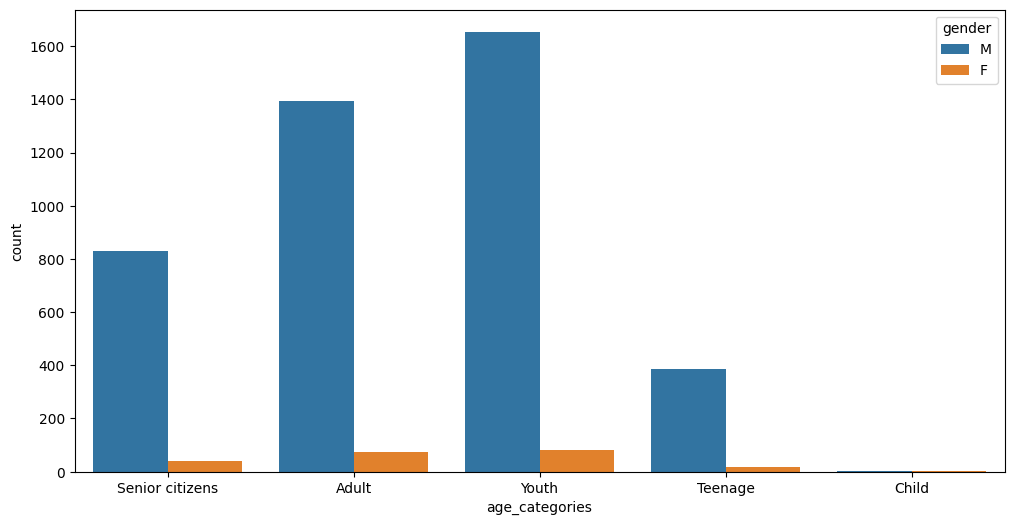

In [127]:
# plt.figure(< '<<__A__>>' >)    # set a plot size (12,6)
# sns.< '<<__B__>>'  >(< '<<__C__>>'>=df,x="age_categories",<'<<__D__>>'>)

plt.figure(figsize=(12,6))    # set a plot size (12,6)
sns.countplot(data=df,x="age_categories",hue='gender')
#plt.show()

# TODO: Code to fill: 
#Replace '<>' with correct method 

# 1. '<<__A__>>' --> write your code to set plot size
# 2. '<<__B__>>' --> write your code here by selecting appropriate method from seaborn
# 3. '<<__C__>>' --> write your parameter here to load data  
# 4. '<<__D__>>' --> write your hue column

### Observations from the bar plot obtained in question 4:
1. There are five age categories in the bar plot : Senior citizens, Adult, Youth, Teenage and Child.
2. It is clearly evident that males committed more number of crimes than females.
3. Even in the Child age_category, there are 2 male criminals and 1 female criminal.

### Question: 5 (2 Marks )
Generate a bar plot using seaborn and understand the year wise kills based on victim race

<Axes: xlabel='year', ylabel='count'>

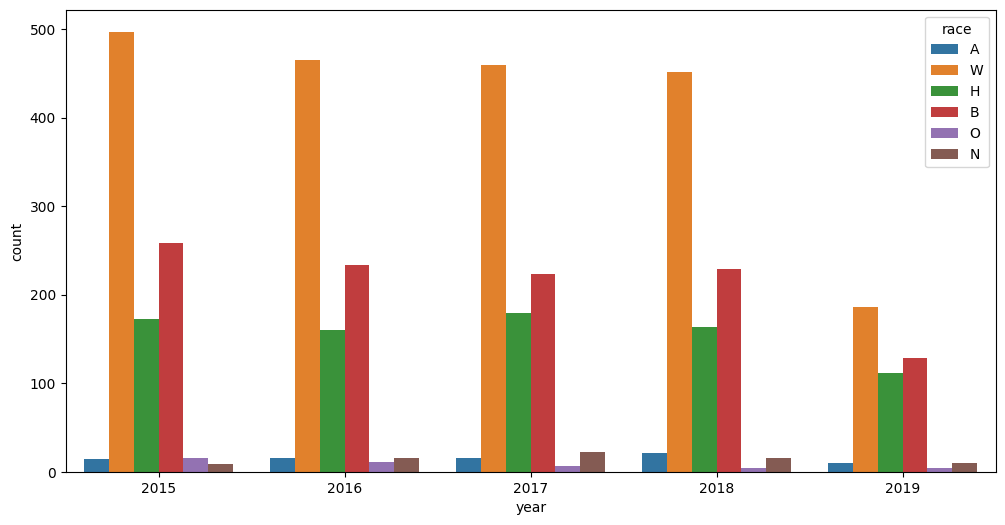

In [128]:
# plt.figure(<'<<__A__>>'>)    # set a plot size (12,6)
# sns.< '<<__B__>>' >(< '<<__C__>>' >=df,x="year",< '<<__D__>>' >) 

plt.figure(figsize=(12,6))    # set a plot size (12,6)
sns.countplot(data=df,x="year",hue='race') 


# TODO: Code to fill: 
#Replace '<>' with correct method 

# 1. '<<__A__>>' --> write your code to set plot size
# 2. '<<__B__>>' --> write your code here by selecting appropriate method from seaborn
# 3. '<<__C__>>' --> write your parameter here to load data  
# 4. '<<__D__>>' --> write your hue column


### Observation from the bar plot obtained in question 5:
1. In the years 2016 and 2017 the number of crimes committed by the races W, B, H, N, A, O are in descending order.
2. In the year 2019, the races A and N committeed the same number of crimes whereas in the years 2015 and 2018, the race A committed more number of crimes than race N.
3. Except in the year 2015, the race O committed the least number of crimes compared to the other rest of the races.

In [129]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_categories,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Senior citizens,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Adult,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Youth,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Youth,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Adult,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4473,4907,Connor Betts,2019-08-04,shot,gun,24.0,M,W,Dayton,OH,True,attack,Not fleeing,False,Youth,2019
4474,4909,Robert Clay Wilsford Jr.,2019-08-04,shot,gun,65.0,M,NaN,Hanceville,AL,True,attack,Not fleeing,False,Senior citizens,2019
4475,4910,TK TK,2019-08-05,shot,undetermined,NaN,NaN,NaN,Salt Lake City,UT,False,undetermined,Not fleeing,True,Senior citizens,2019
4476,4914,James Kirkwood,2019-08-05,shot,knife,49.0,M,B,Memphis,TN,False,attack,Foot,False,Adult,2019


In [130]:
# Save the data into csv to use for week-3 assignment
df.to_csv('week_2_assignment_output.csv', index=False)

## Thank you!